# Data Sets And Numpy
**Enter the names of all group members in the cell below**.  If you are submitting this individually, enter your name, along with the names of anyone you worked with while completing these exercises.


Cole Determan, Ben Berry

## Data Organization
A learning example is comprised of a set of *features* (or *attributes*, or *dimensions*).  In the case where the features are real-valued, each example can be considered a *vector* or a *point*. Let $x$ represent an individual example. Let $d$ be the dimensionality of $x$ Thus, each example $x$ is a single point where $x \in \mathbb{R}^{d}$.

In Python, example data is typically stored in matrix form.  In ML, this data can be
stored 2 ways, in rows, as shown on the left, and in columns, as is shown on the right. 

$\begin{bmatrix} 
--        &    x^{(1)}    & -- \\
--        &    x^{(2)}     & -- \\ 
--         & ...             & -- \\
--         & x^{(m)}    & --   \\
\end{bmatrix}$ 
or
$\begin{bmatrix} 
|            &     |         & |    &   |     \\
x^{(1)}   & x^{(2)}& ... & x^{(m)} \\
|            &     |         & |    &   |     \\
\end{bmatrix}$

### QUESTION
*   Consider two points, $x^{(1)}$ = (1,3) and $x^{(2)}$ = (2,5).
Calculate, by hand, the Euclidean distance between these two points.
Recall that the the formula for Euclidean distance is $$\sqrt { \sum_{i=1}^{d}{(x_{i}^{(1)} - x_{i}^{(2)})^2}}$$. 


2.236

---
## PART 1 - Processing Numpy Arrays Using Loops

Until now, you have primarily used *for* loops for performing mathematical operations
on arrays of numbers.  As an example of doing this in Python, you can use a loop to work 
with a numpy array:

In [1]:
import numpy as np
np.set_printoptions(precision=3) # Keeps output from getting cluttered.


x = np.random.rand(10)

sum_x = 0

for i in range(x.shape[0]):
    sum_x += x[i]

print(sum_x)


4.014970226691205


## Activity 1

In the cell below, complete the `distance_loop` function using a for loop. You can test your implementation by executing the next cell. (To be clear: using loops is *not* a good idea here.  We'll develop a better implementation later.)

In [2]:
# Write the distance_loop method
def distance_loop(x1, x2):
    """ Returns the Euclidean distance between the 1-d numpy arrays x1 and x2"""
    total = 0
    for num in range(len(x1)):
        x = np.square(x1[num] - x2[num])
        total += x
    return np.sqrt(total) 

In [3]:
# Tests for the distance_loop method.

import numpy as np
import math

a = np.array([1.0, 2.0, 3.0])
b = np.array([0.0, 1.0, 4.0])

test_distance = distance_loop(a, b) 
expected_answer = 1.7320508075688772

np.testing.assert_allclose(test_distance, expected_answer)
np.testing.assert_allclose(distance_loop(b, a), expected_answer)
np.testing.assert_allclose(distance_loop(a, a), 0)


## Activity 2
Very soon we will study the *K-Nearest Neighbors* algorithm.  The simplest version is 1-Nearest Neighbors, which classifies a target point by searching through the training data to find the single point that is **nearest** to the target, and using the class of that point as a prediction.  Using a **for loop**, and your completed `distance_loop` function, complete the `nearest_loop` function in the cell below (which would be useful for implementing 1-Nearest Neighbors classifier). 

Here are some potentially helpful reminders:

In [4]:
# The shape property returns a tuple containing the shape of a numpy array:

X = np.random.random((5,3))
print(X)
print(X.shape)

[[0.68  0.702 0.623]
 [0.915 0.976 0.008]
 [0.332 0.876 0.249]
 [0.173 0.43  0.377]
 [0.183 0.568 0.336]]
(5, 3)


In [5]:
# Slicing can be used to extract a single row or column from a numpy array.  
# This extracts the middle column from X:

print(X[:, 1])

[0.702 0.976 0.876 0.43  0.568]


In [6]:
# ##
# Exercise: Complete nearest_loop
# ##

def nearest_loop(X, target):
    """ Return the index of the nearest point in X to target.
         Arguments:
          X      - An m x d numpy array storing m points of dimension d
         target - a length-d numpy array
    """
    min_dist = float('inf')
    min_index = -1
    
    for i in range(X.shape[0]):
        current_dist = distance_loop(X[i, :], target)
        
        if current_dist < min_dist:
            min_dist = current_dist
            min_index = i
    
    return min_index

Execute the cell below to test your implementation.

In [7]:
# Tests for nearest_loop

data = np.array([[0.71, 0.74, 0.06],
                 [0.86, 0.5 , 0.18],
                 [0.35, 0.47, 0.03],
                 [0.57, 0.32, 0.65],
                 [0.3 , 0.17, 0.21],
                 [0.15, 1.  , 0.74]])

assert(nearest_loop(data, np.array([.6, .3, .7]))  == 3)
assert(nearest_loop(data, np.array([.1, 1.0, .7])) == 5)
assert(nearest_loop(data, np.array([.7, .7, .0]))  == 0)       

# PART 2 - Processing Numpy Arrays WITHOUT Loops

Loops in Python are *sllloooowwww*.  The key to writing fast numerical programs in Python is to avoid loops by taking advantage of numpy operators and library calls.

## Activity 3

Complete the `distance` function in the cell below.  The functionality should be exactly the same as `distance_loop`, but your implementation *should not contain any loops* (or list comprehensions).  Execute the following cell to test your implementation and compare the speed to our previous version.

In [8]:
def distance(x1, x2):
    """ Returns the Euclidean distance between the 1-d numpy arrays x1 and x2"""
    # Note: This should be a one-liner!
    return np.sqrt(np.sum((x1 - x2)**2))

In [9]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([0.0, 1.0, 4.0])

dist_a_b = distance(a, b)
expected_dist = 1.7320508075688772

np.testing.assert_allclose(dist_a_b, expected_dist)

In [10]:
# TEST SPEED
dim = 10000 # Try changing this value to see how it impacts the running times.
a = np.random.random(dim)
b = np.random.random(dim)
print('time for distance_loops')

%timeit distance_loop(a, b)

print('--------\n\nTime for distance without loops')
%timeit distance(a, b)

time for distance_loops
5.63 ms ± 118 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
--------

Time for distance without loops
8.24 μs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Activity 4

Complete a method named `nearest` who's functionality should be exactly the same as `nearest_loop`, but your implementation should **not** contain any loops (or list comprehensions). Execute the following cells to test your implementation and compare the speed to the earlier version.  Note that your updated implementation should *not* call your `distance` function... doing so would require you to loop through all of the rows of `X`.

Here are a few useful examples of using numpy that may prove helpful when writing your code.

In [11]:
# "Broadcasting" can be used to apply the same 
# operation across all rows/columns of an array:

X = np.random.random((5, 3))
a = np.array([10, 20, 30])

print("X:\n{}".format(X))
print("a:\n{}".format(a))
print("\nX + a:\n{}".format(X + a)) # Broadcasting!

X:
[[0.358 0.857 0.498]
 [0.817 0.209 0.454]
 [0.573 0.272 0.165]
 [0.348 0.191 0.872]
 [0.05  0.457 0.182]]
a:
[10 20 30]

X + a:
[[10.358 20.857 30.498]
 [10.817 20.209 30.454]
 [10.573 20.272 30.165]
 [10.348 20.191 30.872]
 [10.05  20.457 30.182]]


In [12]:
# argmin can be used to find the index of the smallest element in an array:

b = np.array([5, 5, 1, 5])
print(np.argmin(b))

2


In [13]:
def nearest(X, target):
    """ Return the index of the nearest point in X to target.
         Arguments:
          X      - An m x d numpy array storing m points of dimension d
         target - a length-d numpy array
    """
    # ADVICE: 
    #  - Use a properly broadcast subtraction operation to subtract the target point
    #    from each point in X using one statement.
    #  - Square all of the resulting differences using a single **2 operation.
    #  - use np.sum along with an appopriate axis argument to sum the squared
    #    values across the rows.
    #  - You can take the sqrt of the results, but it isn't necessary (Why?)
    #  - use np.argmin to find the index of the smallest distance.
    
    distances_squared = np.sum((X - target)**2, axis=1)
    return np.argmin(distances_squared)

In [14]:
# Tests for nearest

data = np.array([[0.71, 0.74, 0.06],
                 [0.86, 0.5 , 0.18],
                 [0.35, 0.47, 0.03],
                 [0.57, 0.32, 0.65],
                 [0.3 , 0.17, 0.21],
                 [0.15, 1.  , 0.74]])

assert(nearest(data, np.array([.6, .3, .7]))  == 3)
assert(nearest(data, np.array([.1, 1.0, .7])) == 5)
assert(nearest(data, np.array([.7, .7, .0]))  == 0)      

In [15]:
# TEST SPEED
dim = 3
num = 100000
data1 = np.random.random((num, dim))
point1 = np.random.random(dim)

print('timing nearest_loop')
%timeit nearest_loop(data1, point1)
print('-------\n')

print('timing nearest')
%timeit nearest(data1, point1)

timing nearest_loop
232 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-------

timing nearest
1.29 ms ± 13.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Part 3 - Numpy Masking


The cell below loads a tiny data set of handwritten digits and displays the first digit as an image.

(1797, 64)
(1797,)


<Figure size 640x480 with 0 Axes>

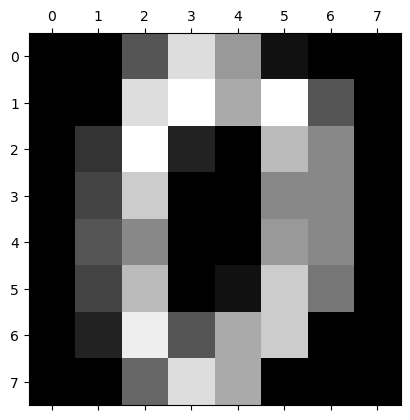

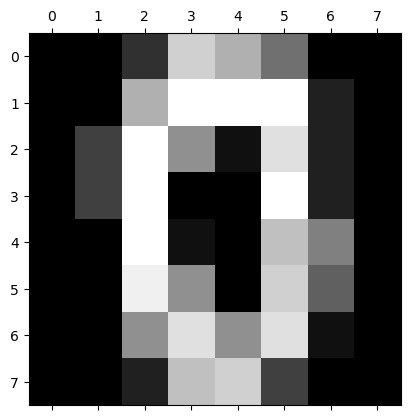

In [16]:
from sklearn.datasets import load_digits
digits, labels = load_digits(return_X_y=True)


print(digits.shape)
print(labels.shape)

# Show the fist and second digits in the data set:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits[0, :].reshape(8, 8)) ## make into a square matrix for matshow
plt.show()
plt.matshow(digits[20, :].reshape(8, 8)) ## make into a square matrix for matshow
plt.show() 

## Activity 5

(Note that this activity is only worth 1 point.  I encourage you to complete it if you have time, but don't stress about it if you need to move on to something else.) 

Use numpy masking and slicing to create a smaller data set that contains only the the 1's and 7's from the data set imported above. Store the images in an array named `digits_subset` and the labels in an array named `labels_subset`

Numpy masking provides a fast and convient way of accessing array entries that satisfy logical conditions (see [section 1.4.1.7 Fancy indexing](https://scipy-lectures.org/intro/numpy/array_object.html#using-boolean-masks) in the reading material **scipy lectures** for a brief introduction).  Here is an example:


In [17]:
# Use numpy operators to pull out all columns 
# with indices that are multiples of 3 or 7

X = np.random.random((3, 10))
print("X:\n{}".format(X))

all_cols = np.arange(0, X.shape[1])

print("\nAll column indices: {}".format(all_cols))

# Which are multiples of three?
cols_mult_3 = all_cols % 3 == 0

print("\nMultiples of three:")
print(cols_mult_3)

# Which are multiples of seven?
cols_mult_7 = all_cols % 7 == 0

print("\nMultiples of seven:")
print(cols_mult_7)

# We can use logical operators to combine boolean numpy arrays:
col_mask = cols_mult_3 | cols_mult_7

print("\nFinal mask:")
print(col_mask)

X_reduced = X[:, col_mask]

print("\nX_reduced:\n{}".format(X_reduced))

X:
[[0.702 0.803 0.807 0.903 0.168 0.83  0.855 0.429 0.24  0.145]
 [0.732 0.151 0.625 0.059 0.338 0.17  0.656 0.861 0.391 0.484]
 [0.101 0.525 0.037 0.41  0.19  0.068 0.78  0.867 0.383 0.028]]

All column indices: [0 1 2 3 4 5 6 7 8 9]

Multiples of three:
[ True False False  True False False  True False False  True]

Multiples of seven:
[ True False False False False False False  True False False]

Final mask:
[ True False False  True False False  True  True False  True]

X_reduced:
[[0.702 0.903 0.855 0.429 0.145]
 [0.732 0.059 0.656 0.861 0.484]
 [0.101 0.41  0.78  0.867 0.028]]


In [18]:
# Write code here to initialize the variables digits_subset and labels_subset.

digits = load_digits()

images = digits.data         # shape (1797, 64)
labels = digits.target       # shape (1797,)

mask = (labels == 1) | (labels == 7)

digits_subset = images[mask]
labels_subset = labels[mask]

print(digits_subset.shape) # should be (361, 64)
print(labels_subset.shape) # should be (361,)

(361, 64)
(361,)


In [19]:
assert(digits_subset.shape == (361,64))
assert(labels_subset.shape == (361,))
assert(labels_subset[0] == 1)
assert(labels_subset[-1] == 7)

<Figure size 640x480 with 0 Axes>

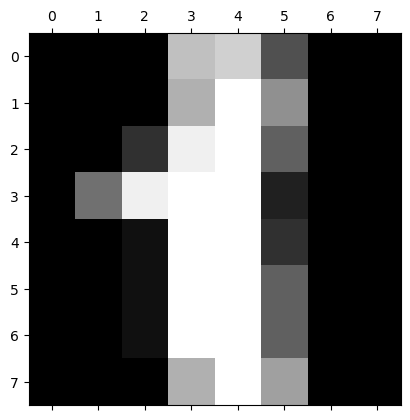

<Figure size 640x480 with 0 Axes>

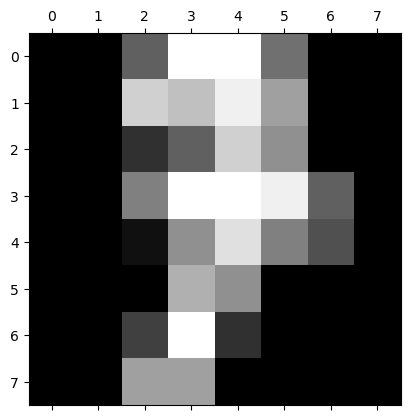

In [20]:
# Look at some of the digits, assuming the variables have been initialized correctly.
plt.gray() 
plt.matshow(digits_subset[0,:].reshape(8,8)) # should be a "1"
plt.figure()
plt.matshow(digits_subset[180,:].reshape(8,8))  # should be "7"
plt.show() 